In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar100

In [3]:
(x_train , y_train),(x_test,y_test) = cifar100.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
x_train , x_test = x_train/255.0 , x_test/255.0

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(100)
])

In [9]:
model.summary(())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [10]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [11]:
model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

cb=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history=model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),callbacks=[cb])

Epoch 1/30
1563/1563 [==============================] - 39s 25ms/step - loss: 4.5893 - accuracy: 0.0150 - val_loss: 4.5143 - val_accuracy: 0.0243
Epoch 2/30
1563/1563 [==============================] - 40s 26ms/step - loss: 4.3242 - accuracy: 0.0409 - val_loss: 4.1643 - val_accuracy: 0.0573
Epoch 3/30
1563/1563 [==============================] - 41s 26ms/step - loss: 4.0181 - accuracy: 0.0868 - val_loss: 3.8893 - val_accuracy: 0.1119
Epoch 4/30
1563/1563 [==============================] - 38s 25ms/step - loss: 3.7795 - accuracy: 0.1296 - val_loss: 3.6805 - val_accuracy: 0.1451
Epoch 5/30
1563/1563 [==============================] - 38s 24ms/step - loss: 3.5874 - accuracy: 0.1630 - val_loss: 3.5519 - val_accuracy: 0.1710
Epoch 6/30
1563/1563 [==============================] - 38s 24ms/step - loss: 3.4194 - accuracy: 0.1890 - val_loss: 3.4074 - val_accuracy: 0.1948
Epoch 7/30
1563/1563 [==============================] - 38s 24ms/step - loss: 3.2727 - accuracy: 0.2155 - val_loss: 3.2712 -

313/313 - 3s - loss: 2.7762 - accuracy: 0.3551


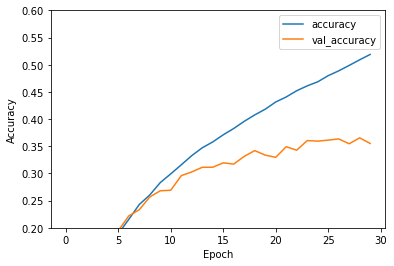

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2,0.6])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

# Fashion MNIST 

In [13]:
#Fashion MNIST
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [14]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [15]:
X_train=X_train.reshape(60000,28*28*1)
X_test=X_test.reshape(10000,28*28*1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocessing
X_train/=255.0
X_test/=255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [16]:
initializers=tf.keras.initializers.glorot_normal()

model=tf.keras.models.Sequential([
tf.keras.layers.Dense(1024,input_dim=784,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(512,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(256,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(10,kernel_initializer=initializers,bias_initializer=initializers,activation='softmax')])

#compile
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

cb=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6571 - accuracy: 0.7793 - val_loss: 0.5263 - val_accuracy: 0.8090
Epoch 2/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4462 - accuracy: 0.8420 - val_loss: 0.4443 - val_accuracy: 0.8411
Epoch 3/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4000 - accuracy: 0.8586 - val_loss: 0.4316 - val_accuracy: 0.8472
Epoch 4/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3721 - accuracy: 0.8678 - val_loss: 0.3977 - val_accuracy: 0.8574
Epoch 5/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3517 - accuracy: 0.8738 - val_loss: 0.3814 - val_accuracy: 0.8630
Epoch 6/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3339 - accuracy: 0.8792 - val_loss: 0.3835 - val_accuracy: 0.8634
Epoch 7/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3201 - accuracy: 0.8846 - val_loss: 0.3618 - val_a

313/313 - 1s - loss: 0.3133 - accuracy: 0.8925


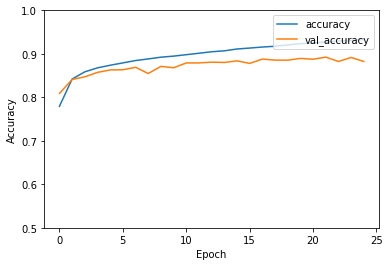

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

# MNIST

In [18]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.utils import to_categorical

(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape(60000,28*28*1)
X_test=X_test.reshape(10000,28*28*1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocessing
X_train/=255.0
X_test/=255.0

11493376/11490434 [==============================] - 18s 2us/step


In [19]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [20]:
initializers=tf.keras.initializers.glorot_normal()
model=tf.keras.models.Sequential([
tf.keras.layers.Dense(1024,input_dim=784,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(512,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(256,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(10,kernel_initializer=initializers,bias_initializer=initializers,activation='softmax')])

In [21]:
#compile
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

cb=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5223 - accuracy: 0.8657 - val_loss: 0.2575 - val_accuracy: 0.9263
Epoch 2/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2337 - accuracy: 0.9326 - val_loss: 0.1998 - val_accuracy: 0.9440
Epoch 3/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1788 - accuracy: 0.9480 - val_loss: 0.1571 - val_accuracy: 0.9538
Epoch 4/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1438 - accuracy: 0.9581 - val_loss: 0.1332 - val_accuracy: 0.9613
Epoch 5/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1194 - accuracy: 0.9660 - val_loss: 0.1135 - val_accuracy: 0.9660
Epoch 6/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1005 - accuracy: 0.9714 - val_loss: 0.1022 - val_accuracy: 0.9683
Epoch 7/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0866 - accuracy: 0.9751 - val_loss: 0.0949 - val_ac